In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

# **Titanic Dataset**

In [163]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Dataset Basic info

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [165]:
df.shape

(891, 12)

## Checking No.of Columns

In [166]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Statistical Summary

In [167]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking Missing Values

In [168]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **Separation of Countinous variable columns and categorical variables**

In [169]:
df_num = df.select_dtypes(include=[np.number])

## **Continous Variable Columns**

In [170]:
df_num.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [171]:
# Categrical Variables Columns
df_cat=df.select_dtypes(include="object")
df_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

# **Imputation - finding the null values**

In [172]:
df_num.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

## Applying median for all the null vales

In [173]:
median_age = df_num['Age'].median()
df_num['Age'] = df_num['Age'].fillna(median_age)

In [174]:
df_num.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

# **Removing the datapoints which are more than 75% and less than 25%**

In [175]:
df_num['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [176]:
df_Fare = df_num[(df_num["Fare"]>7.91)&(df_num["Fare"]<31)]

# **Plotting Boxplot After Removal**

<Axes: ylabel='Fare'>

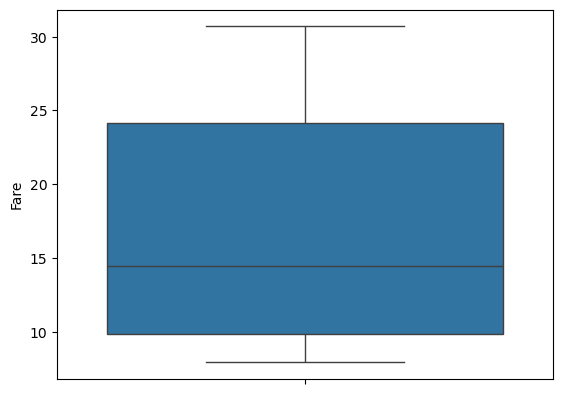

In [177]:
sns.boxplot(y=df_Fare["Fare"])

# **Standard Scaler**

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
sc = StandardScaler()

In [180]:
sco = sc.fit(df_Fare)

In [181]:
df_num_standard_scaler = sco.fit_transform(df_Fare)

<Axes: >

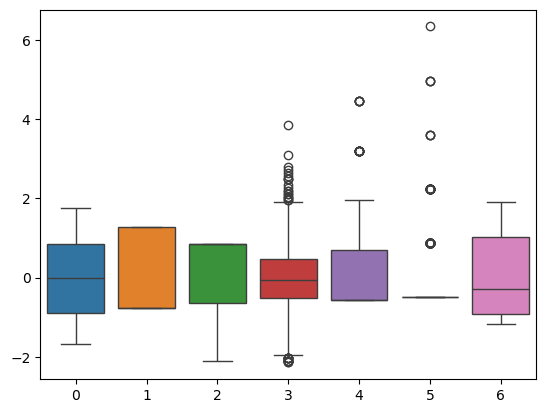

In [182]:
sns.boxplot(df_num_standard_scaler)

In [183]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
mms = MinMaxScaler()

In [185]:
mmso = mms.fit(df_Fare)

In [186]:
df_num_minmax_scaler = mmso.fit_transform(df_Fare)

# **MinMax Scaler**

<Axes: >

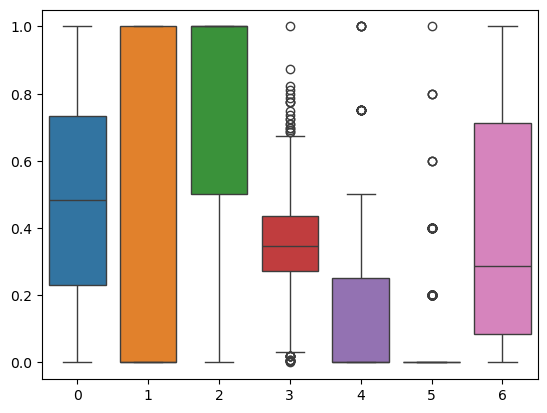

In [187]:
sns.boxplot(df_num_minmax_scaler)

## **Categorical Variables Columns**

In [188]:
df_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

## **Finding Null values in Categorical Variables**

In [189]:
df_cat.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

## **Replacing Null values with Mode or Dropping the values if there are more null values in the columns**

In [190]:
df_cat['Cabin'].fillna(df_cat['Cabin'].value_counts().idxmax(),inplace=True)


In [191]:
df_cat['Embarked'].fillna(df_cat['Embarked'].value_counts().idxmax(),inplace=True)


In [192]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96 B98,S


## **Checking Unique Values**

In [193]:
df_cat[['Name','Sex','Ticket','Cabin','Embarked']].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

# **Lable Encoding**

In [194]:
from sklearn.preprocessing import LabelEncoder

In [195]:
le = LabelEncoder()

In [196]:
df_cat = df_cat.apply(le.fit_transform)

In [197]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,108,1,523,47,2
1,190,0,596,81,0
2,353,0,669,47,2
3,272,0,49,55,2
4,15,1,472,47,2


In [198]:
df_Fare.shape

(443, 7)

In [199]:
df_cat.shape

(891, 5)

In [200]:
df_cat = df_cat.loc[df_Fare.index.values,:]

## **Concatenate Numerical Values and Categorical Vales**

In [201]:
d1 = pd.DataFrame(df_num_minmax_scaler, columns = df_num.columns)

In [202]:
d1.reset_index(inplace=True)

In [203]:
df_cat.reset_index(inplace=True)

In [204]:
df_Final = pd.concat([d1, df_cat], axis=1)

In [205]:
df_Final.shape

(443, 14)

# **Final DataSet**

In [206]:
df_Final

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,index,Name,Sex,Ticket,Cabin,Embarked
0,0,0.000000,1.0,1.0,0.321438,0.00,0.0,0.000000,2,353,0,669,47,2
1,1,0.002255,0.0,1.0,0.434531,0.00,0.0,0.005489,4,15,1,472,47,2
2,2,0.003382,0.0,1.0,0.346569,0.00,0.0,0.023420,5,554,1,275,47,1
3,3,0.005637,0.0,1.0,0.019854,0.75,0.2,0.577494,7,624,1,395,47,2
4,4,0.006764,1.0,1.0,0.334004,0.00,0.4,0.140895,8,412,0,344,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,438,0.995490,0.0,1.0,0.484795,0.00,1.0,0.931017,885,684,0,480,47,1
439,439,0.996618,0.0,0.5,0.334004,0.00,0.0,0.222873,886,548,1,101,47,2
440,440,0.997745,1.0,0.0,0.233476,0.00,0.0,0.969443,887,303,0,14,30,2
441,441,0.998873,0.0,1.0,0.346569,0.25,0.4,0.681794,888,413,0,675,47,2


## **Model Training**

In [207]:
Y = df_Final['Survived']

In [208]:
X = df_Final.drop(['Survived'], axis=1)

## **Spliting the Data for Training(70%) and Testing(30%)** 

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

## **LogisticRegression Training Score**

In [210]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
lm = log_model.fit(X_train, y_train)
lm.score(X_train, y_train)


0.8

## **Decision Tree Classifier Training Score**

In [211]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
dt1 = dt_model.fit(X_train, y_train)
dt1.score(X_train, y_train)

0.8741935483870967

## **Random Forest Classifier Training Score**

In [212]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=3)
rt = rf_model.fit(X_train, y_train)
rt.score(X_train, y_train)

0.8709677419354839

# **Model Validation**

In [213]:
from sklearn.metrics import accuracy_score, r2_score

## *Logistic Regression Testing Score*

In [214]:
lm_y_pred = lm.predict(X_test)
accuracy_score(y_test, lm_y_pred)

0.6917293233082706

## *Decision Tree Classifier Testing Score*

In [215]:
dt_y_pred = dt1.predict(X_test)
accuracy_score(y_test, dt_y_pred)

0.6992481203007519

## *Random Foresr Classifier Testing Score*

In [216]:
rt_y_pred = rt.predict(X_test)
accuracy_score(y_test, rt_y_pred)

0.7518796992481203